In [12]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fetching files, loading them with different libraries and visualizing with nglview

In [3]:
!wget https://files.rcsb.org/view/1PKN.pdb

--2021-02-28 22:55:04--  https://files.rcsb.org/view/1PKN.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.197
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1PKN.pdb’

1PKN.pdb                [    <=>             ] 353.50K   442KB/s    in 0.8s    

2021-02-28 22:55:06 (442 KB/s) - ‘1PKN.pdb’ saved [361989]



In [13]:
!head 1PKN.pdb

HEADER    PHOSPHOTRANSFERASE                      25-MAR-94   1PKN              
TITLE     STRUCTURE OF RABBIT MUSCLE PYRUVATE KINASE COMPLEXED WITH             
TITLE    2 MN2+, K+, AND PYRUVATE                                               
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: PYRUVATE KINASE;                                           
COMPND   3 CHAIN: A;                                                            
COMPND   4 EC: 2.7.1.40;                                                        
COMPND   5 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: ORYCTOLAGUS CUNICULUS;                          


In [14]:
import nglview as nv

In [15]:
view = nv.show_structure_file('1PKN.pdb')

In [16]:
view

NGLWidget()

In [17]:
import MDAnalysis

In [18]:
u=MDAnalysis.Universe('1PKN.pdb')

In [19]:
s=u.select_atoms('all')

In [20]:
nv.show_mdanalysis(s)

NGLWidget()

In [21]:
import prody

In [22]:
pkn = prody.parsePDB('1PKN.pdb')

@> 3937 atoms and 1 coordinate set(s) were parsed in 0.05s.


In [23]:
nv.show_prody(pkn)

NGLWidget()

## Extract and analyze atom coordinates

#### Let's extract positions of C-alpha atoms in MDAnalysis

In [24]:
s=u.select_atoms('protein and name CA')

In [27]:
s.atoms.positions

array([[66.381, 47.66 , 51.52 ],
       [63.37 , 45.878, 52.463],
       [60.759, 44.413, 50.245],
       ...,
       [56.635, 26.235, 58.766],
       [57.039, 25.161, 55.154],
       [58.576, 21.693, 54.704]], dtype=float32)

#### Let's make a histogram of Calpha distances

In [32]:
import numpy as np

In [38]:
c=s.atoms.positions
dvec=c[1:]-c[0:-1]
d=np.array([np.sqrt(i[0]**2+i[1]**2+i[2]**2) for i in dvec])

In [39]:
import seaborn as sns

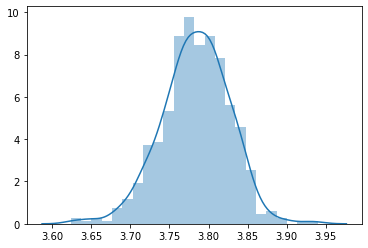

In [40]:
sns.distplot(d[d<5])

In [106]:
s.radius_of_gyration()

24.25554730915232

## Extract and analyze dihedral (torsion) angles

In [42]:
from MDAnalysis.analysis.dihedrals import Dihedral

In [55]:
r=u.residues[1]

In [64]:
r.phi_selection().names

array(['C', 'N', 'CA', 'C'], dtype=object)

In [60]:
dih=Dihedral([r.phi_selection()])

In [62]:
dih.run()

In [63]:
dih.angles

array([[-67.78035238]])

In [65]:
from MDAnalysis.analysis.dihedrals import Ramachandran

In [66]:
R=Ramachandran(s)

In [67]:
R.run()

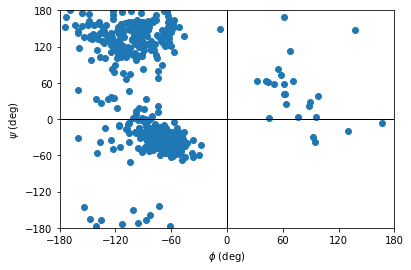

In [68]:
R.plot()

### Add hydrogens to the structure

In [69]:
!reduce 1PKN.pdb

reduce: version 3.3 06/02/2016, Copyright 1997-2016, J. Michael Word
Processing file: "1PKN.pdb"
Database of HETATM connections: "/opt/miniconda3/envs/moldyn/dat/reduce_wwPDB_het_dict.txt"
VDW dot density = 16/A^2
Orientation penalty scale = 1 (100%)
Eliminate contacts within 3 bonds.
Ignore atoms with |occupancy| <= 0.01 during adjustments.
Waters ignored if B-Factor >= 40 or |occupancy| < 0.66
Aromatic rings in amino acids accept hydrogen bonds.
Building or keeping OH & SH Hydrogens.
Rotating NH3 Hydrogens.
Not processing Met methyls.
*WARNING*: Residues SER 126  and GLU 132  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues SER 126  and GLU 132  in chain  A appear unbonded 
            and will be treated as a chain break
 Singles(size 92): A  14 THR OG1 : A  24 THR OG1 : A  30 CYS SG  : A  36 SER OG  
  : A  40 THR OG1 : A  44 THR OG1 : A  48 CYS SG  : A  49 THR OG1 : A  54 SER OG  
  : A  61 LYS NZ  : A  65 LYS NZ  : A  66 SER OG  : 

### Identify protonation states

In [70]:
!propka 1PKN.pdb

propka3.0, revision 182                                                                      2021-03-01
-------------------------------------------------------------------------------------------------------
--                                                                                                   --
--                                   PROPKA: A PROTEIN PKA PREDICTOR                                 --
--                                                                                                   --
--                                VERSION 1.0,  04/25/2004, IOWA CITY                                --
--                                             BY HUI LI                                             --
--                                                                                                   --
--                               VERSION 2.0,  11/05/2007, IOWA CITY/COPENHAGEN                      --
--                                BY DELPHINE C. BAS AND DAVID M

In [72]:
!cat 1PKN.pka

propka3.0, revision 182                                                                      2021-03-01
-------------------------------------------------------------------------------------------------------
--                                                                                                   --
--                                   PROPKA: A PROTEIN PKA PREDICTOR                                 --
--                                                                                                   --
--                                VERSION 1.0,  04/25/2004, IOWA CITY                                --
--                                             BY HUI LI                                             --
--                                                                                                   --
--                               VERSION 2.0,  11/05/2007, IOWA CITY/COPENHAGEN                      --
--                                BY DELPHINE C. BAS AND DAVID M

#### assign charges to the atoms

In [75]:
!pdb2pqr 1PKN.pdb 1PKN.pqr --ff amber


--------------------------
PDB2PQR - a Python-based structural conversion utility
--------------------------
Please cite your use of PDB2PQR as:
  Dolinsky TJ, Nielsen JE, McCammon JA, Baker NA.
  PDB2PQR: an automated pipeline for the setup, execution,
  and analysis of Poisson-Boltzmann electrostatics calculations.
  Nucleic Acids Research 32 W665-W667 (2004).



In [76]:
!cat 1PKN.pqr

REMARK   1 PQR file generated by PDB2PQR (Version FIXME)
REMARK   1
REMARK   1 Command line used to generate this file:
REMARK   1 1PKN.pdb 1PKN.pqr --ff amber
REMARK   1
REMARK   1 Forcefield Used: AMBER
REMARK   1
REMARK   5 Gap in backbone detected between SER A 126 and GLU A 132!
REMARK   5
REMARK   5 WARNING: PDB2PQR was unable to assign charges
REMARK   5          to the following atoms (omitted below):
REMARK   5              3931 K in K 532
REMARK   5              3932 MN in MN 534
REMARK   5              3933 C1 in PYR 533
REMARK   5              3934 O1 in PYR 533
REMARK   5              3935 O2 in PYR 533
REMARK   5              3936 C2 in PYR 533
REMARK   5              3937 O3 in PYR 533
REMARK   5              3938 C3 in PYR 533
REMARK   5 This is usually due to the fact that this residue is not
REMARK   5 an amino acid or nucleic acid; or, there are no parameters
REMARK   5 available for the specific protonation state of this
REMARK   5 residue in the selected forcefield

### build contact maps

In [87]:
c

array([[66.381, 47.66 , 51.52 ],
       [63.37 , 45.878, 52.463],
       [60.759, 44.413, 50.245],
       ...,
       [56.635, 26.235, 58.766],
       [57.039, 25.161, 55.154],
       [58.576, 21.693, 54.704]], dtype=float32)

In [88]:
from scipy.spatial.distance import pdist,squareform

In [91]:
dm=squareform(pdist(c))

In [93]:
dm.shape

(514, 514)

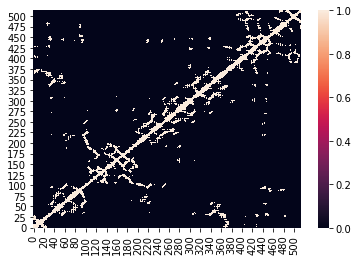

In [104]:
ax = sns.heatmap(np.where(dm<12,1,0))
ax.invert_yaxis()

### Analyze dynamics using elastic networks models with ProDy

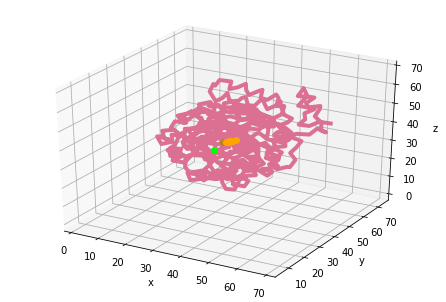

In [105]:
prody.showProtein(pkn)

In [107]:
prot=pkn.select('protein')

In [109]:
 anm, atoms = prody.calcANM(prot, selstr='calpha')

@> Hessian was built in 0.26s.
@> 20 modes were calculated in 0.24s.


In [110]:
slowest_mode = anm[0]

In [111]:
print( slowest_mode )

Mode 1 from ANM 1PKN


In [112]:
print( slowest_mode.getEigval().round(3) )

0.162


<Mode: 1 from ANM 1PKN>

In [115]:
prody.writeNMD('1pkn.nmd',anm[:3],atoms)

'1pkn.nmd'

the file can be opened in VMD using normal mode wizard